In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from dynadojo.systems.lds import LDSystem
from dynadojo.wrappers import SystemChecker
from dynadojo.utils.lds import plot

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

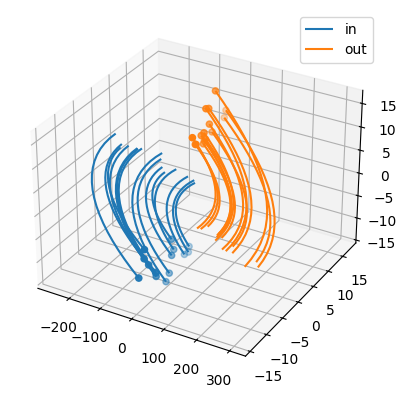

In [12]:
latent_dim = 3
embed_dim = 10
n = 15
timesteps = 20
system = SystemChecker(LDSystem(latent_dim, embed_dim, noise_scale=0, seed=2))
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, timesteps=timesteps)
y = system.make_data(y0, timesteps=timesteps, noisy=True)
plot([x, y], target_dim=min(latent_dim, 3), labels=["in", "out"], max_lines=15)

/Users/logan/PycharmProjects/dynadojo/venv/lib/python3.10/site-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 2.1213045227484806e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


x_err=4.0512453956404e-10
y_err=5.846526054416613e-10


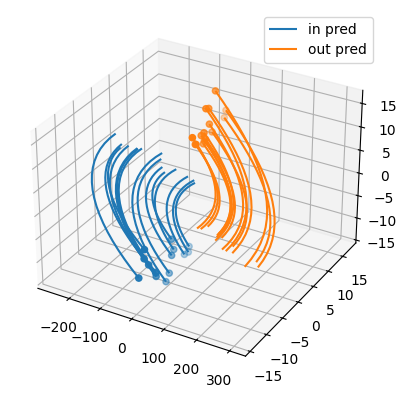

In [13]:
from dynadojo.baselines.dmd import DMD
from dynadojo.wrappers import AlgorithmChecker

dmd = AlgorithmChecker(DMD(embed_dim, timesteps, activation=None, max_control_cost=0))
dmd.fit(x)
x_pred = dmd.predict(x[:, 0], timesteps)
y_pred = dmd.predict(y[:, 0], timesteps)
plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")